In [ ]:
import os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

# ==============================
# PATH DATASET
# ==============================
BASE_DIR = "/content/drive/MyDrive/semester 7/Skripsi/dataset"
DATA_DIR = os.path.join(BASE_DIR, "OriginalSet")   # <- ganti kalau mau EDA folder baru

classes = ["pestalotiopsis", "sigatoka", "cordana", "healthy"]

# ==============================
# OUTPUT EDA (folder baru biar rapi)
# ==============================
EDA_DIR = os.path.join(BASE_DIR, "eda_bab4_output")
os.makedirs(EDA_DIR, exist_ok=True)

print("BASE_DIR:", BASE_DIR)
print("DATA_DIR:", DATA_DIR, "| exist:", os.path.exists(DATA_DIR))
print("EDA_DIR :", EDA_DIR)
print("Classes :", classes)


BASE_DIR: /content/drive/MyDrive/semester 7/Skripsi/dataset
DATA_DIR: /content/drive/MyDrive/semester 7/Skripsi/dataset/OriginalSet | exist: True
EDA_DIR : /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output
Classes : ['pestalotiopsis', 'sigatoka', 'cordana', 'healthy']


In [ ]:
def list_images(folder):
    exts = ("*.jpg","*.jpeg","*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(folder, e)))
    return sorted(files)

class_counts = []
for cls in classes:
    cls_path = os.path.join(DATA_DIR, cls)
    n = len(list_images(cls_path))
    class_counts.append({"Kelas": cls, "Jumlah Citra": n})

df_class = pd.DataFrame(class_counts)
display(df_class)

csv_path = os.path.join(EDA_DIR, "eda_class_distribution.csv")
df_class.to_csv(csv_path, index=False)
print("Saved:", csv_path)

print("Total citra:", df_class["Jumlah Citra"].sum())


,Kelas,Jumlah Citra
0,pestalotiopsis,173
1,sigatoka,473
2,cordana,162
3,healthy,129


Saved: /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output/eda_class_distribution.csv
Total citra: 937


In [ ]:
sizes = []

for cls in classes:
    cls_dir = os.path.join(DATA_DIR, cls)
    for f in list_images(cls_dir):
        try:
            with Image.open(f) as img:
                w, h = img.size
            sizes.append({
                "Kelas": cls,
                "Width": w,
                "Height": h,
                "File": os.path.basename(f)
            })
        except:
            pass

df_sizes = pd.DataFrame(sizes)

display(df_sizes.head(10))
print("Total images recorded:", len(df_sizes))


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.12/dist-packages/PIL/JpegImagePlugin.py:887: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


,Kelas,Width,Height,File
0,pestalotiopsis,224,224,0.jpeg
1,pestalotiopsis,224,224,1.jpeg
2,pestalotiopsis,224,224,10.jpeg
3,pestalotiopsis,224,224,100.jpeg
4,pestalotiopsis,224,224,101.jpeg
5,pestalotiopsis,224,224,102.jpeg
6,pestalotiopsis,224,224,103.jpeg
7,pestalotiopsis,224,224,104.jpeg
8,pestalotiopsis,224,224,105.jpeg
9,pestalotiopsis,224,224,106.jpeg


Total images recorded: 937


In [ ]:
from collections import Counter

# Hitung frekuensi resolusi (width, height)
resolution_counter = Counter(
    [(row["Width"], row["Height"]) for _, row in df_sizes.iterrows()]
)

# Ambil Top 3 resolusi terbanyak
top3_res = resolution_counter.most_common(3)

# Buat tabel ringkas (Bab IV friendly)
top3_df = pd.DataFrame(
    top3_res,
    columns=["Resolusi (Width×Height)", "Jumlah Citra"]
)

# Pecah resolusi jadi width & height biar rapi
top3_df["Width"] = top3_df["Resolusi (Width×Height)"].apply(lambda x: x[0])
top3_df["Height"] = top3_df["Resolusi (Width×Height)"].apply(lambda x: x[1])

top3_df = top3_df[["Width", "Height", "Jumlah Citra"]]

display(top3_df)

# Simpan ke CSV (bukti Bab IV)
csv_top3 = os.path.join(EDA_DIR, "eda_top3_image_resolution.csv")
top3_df.to_csv(csv_top3, index=False)
print("Saved:", csv_top3)

,Width,Height,Jumlah Citra
0,224,224,937


Saved: /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output/eda_top3_image_resolution.csv


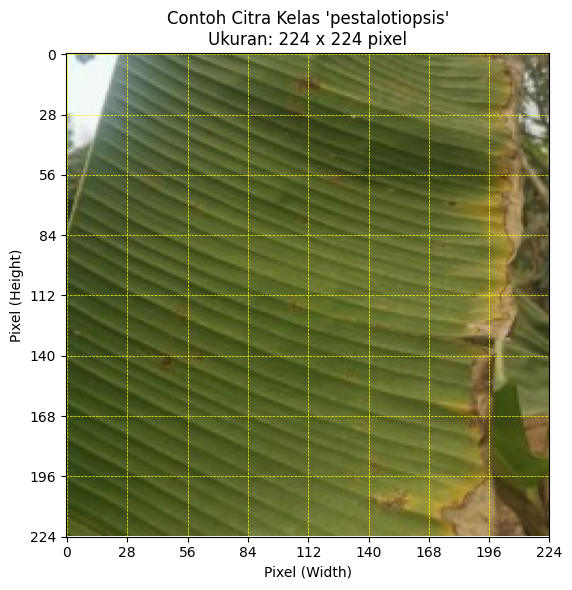

In [ ]:
import matplotlib.pyplot as plt

# Ambil satu contoh gambar
sample_cls = classes[0]
sample_img_path = os.path.join(
    DATA_DIR, sample_cls,
    os.listdir(os.path.join(DATA_DIR, sample_cls))[0]
)

img = Image.open(sample_img_path)

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title(f"Contoh Citra Kelas '{sample_cls}'\nUkuran: {img.size[0]} x {img.size[1]} pixel")

# Aktifkan grid pixel
plt.xticks(np.linspace(0, img.size[0], 9))
plt.yticks(np.linspace(0, img.size[1], 9))
plt.grid(color="yellow", linestyle="--", linewidth=0.5)

plt.xlabel("Pixel (Width)")
plt.ylabel("Pixel (Height)")
plt.tight_layout()
plt.show()

In [ ]:
broken = []
checked = 0

valid_ext = (".jpg",".jpeg",".png")

for cls in classes:
    cls_dir = os.path.join(DATA_DIR, cls)
    for f in os.listdir(cls_dir):
        if not f.lower().endswith(valid_ext):
            continue

        path = os.path.join(cls_dir, f)
        checked += 1
        try:
            with Image.open(path) as im:
                im.verify()  # cek struktur file
        except Exception as e:
            broken.append({
                "Kelas": cls,
                "File": f,
                "Path": path,
                "Error": str(e)[:150]
            })

broken_df = pd.DataFrame(broken)
broken_count = len(broken_df)

summary_df = pd.DataFrame([{
    "Total diperiksa": checked,
    "Valid": checked - broken_count,
    "Rusak / tidak terbuka": broken_count,
    "Persentase rusak (%)": round((broken_count/checked)*100, 4) if checked else 0
}])

print("=== RINGKASAN CEK GAMBAR RUSAK ===")
display(summary_df)

csv_summary = os.path.join(EDA_DIR, "eda_broken_summary.csv")
summary_df.to_csv(csv_summary, index=False)
print("Saved:", csv_summary)

if broken_count > 0:
    display(broken_df.head(10))
    csv_broken = os.path.join(EDA_DIR, "eda_broken_files.csv")
    broken_df.to_csv(csv_broken, index=False)
    print("Saved:", csv_broken)
else:
    print("✅ Tidak ditemukan gambar rusak.")


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.12/dist-packages/PIL/JpegImagePlugin.py:887: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


=== RINGKASAN CEK GAMBAR RUSAK ===


,Total diperiksa,Valid,Rusak / tidak terbuka,Persentase rusak (%)
0,937,937,0,0.0


Saved: /content/drive/MyDrive/semester 7/Skripsi/dataset/eda_bab4_output/eda_broken_summary.csv
✅ Tidak ditemukan gambar rusak.


#Spliting Data

In [ ]:
import os, random, shutil
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image, ImageEnhance, ImageFilter

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

BASE_DIR = "/content/drive/MyDrive/semester 7/Skripsi/dataset"
ORIG_DIR = os.path.join(BASE_DIR, "OriginalSet")

OUT_DIR  = os.path.join(BASE_DIR, "dataset_ready_custom")  # folder baru biar aman
TRAIN_DIR = os.path.join(OUT_DIR, "train")
VAL_DIR   = os.path.join(OUT_DIR, "val")
TEST_DIR  = os.path.join(OUT_DIR, "test")

classes = ["pestalotiopsis", "sigatoka", "cordana", "healthy"]

VAL_PER_CLASS  = 20
TEST_PER_CLASS = 20

print("ORIG_DIR:", ORIG_DIR, "| exist:", os.path.exists(ORIG_DIR))
print("OUT_DIR :", OUT_DIR)
print("Classes :", classes)

ORIG_DIR: /content/drive/MyDrive/semester 7/Skripsi/dataset/OriginalSet | exist: True
OUT_DIR : /content/drive/MyDrive/semester 7/Skripsi/dataset/dataset_ready_custom
Classes : ['pestalotiopsis', 'sigatoka', 'cordana', 'healthy']


In [ ]:
def list_images(folder):
    exts = ("*.jpg","*.jpeg","*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(folder, e)))
    return sorted(files)


In [ ]:
# Safety: jangan ketimpa
if os.path.exists(OUT_DIR) and len(os.listdir(OUT_DIR)) > 0:
    raise FileExistsError(
        f"Folder output sudah ada dan tidak kosong: {OUT_DIR}\n"
        "Ganti nama OUT_DIR atau hapus folder itu dulu."
    )

for root in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    for cls in classes:
        os.makedirs(os.path.join(root, cls), exist_ok=True)

print("✅ Struktur folder output siap:", OUT_DIR)


✅ Struktur folder output siap: /content/drive/MyDrive/semester 7/Skripsi/dataset/dataset_ready_custom


In [ ]:
split_log = []

for cls in classes:
    src_cls = os.path.join(ORIG_DIR, cls)
    imgs = list_images(src_cls)

    if len(imgs) < (VAL_PER_CLASS + TEST_PER_CLASS + 1):
        raise ValueError(
            f"Jumlah gambar kelas '{cls}' terlalu sedikit ({len(imgs)}). "
            f"Butuh minimal {VAL_PER_CLASS + TEST_PER_CLASS + 1}."
        )

    random.shuffle(imgs)

    val_files  = imgs[:VAL_PER_CLASS]
    test_files = imgs[VAL_PER_CLASS:VAL_PER_CLASS + TEST_PER_CLASS]
    train_files = imgs[VAL_PER_CLASS + TEST_PER_CLASS:]

    for f in train_files:
        shutil.copy2(f, os.path.join(TRAIN_DIR, cls, os.path.basename(f)))
    for f in val_files:
        shutil.copy2(f, os.path.join(VAL_DIR, cls, os.path.basename(f)))
    for f in test_files:
        shutil.copy2(f, os.path.join(TEST_DIR, cls, os.path.basename(f)))

    split_log.append({
        "Kelas": cls,
        "Total": len(imgs),
        "Train": len(train_files),
        "Val": len(val_files),
        "Test": len(test_files),
    })

df_split = pd.DataFrame(split_log)
display(df_split)
print("✅ Split selesai.")


,Kelas,Total,Train,Val,Test
0,pestalotiopsis,173,133,20,20
1,sigatoka,473,433,20,20
2,cordana,162,122,20,20
3,healthy,129,89,20,20


✅ Split selesai.


In [ ]:
def count_images_per_class(split_dir):
    counts = {}
    for cls in classes:
        cls_path = os.path.join(split_dir, cls)
        counts[cls] = len(list_images(cls_path))
    return counts, sum(counts.values())

for name, path in [("TRAIN", TRAIN_DIR), ("VAL", VAL_DIR), ("TEST", TEST_DIR)]:
    cnt, total = count_images_per_class(path)
    print(name, cnt, "| TOTAL:", total)


TRAIN {'pestalotiopsis': 133, 'sigatoka': 433, 'cordana': 122, 'healthy': 89} | TOTAL: 777
VAL {'pestalotiopsis': 20, 'sigatoka': 20, 'cordana': 20, 'healthy': 20} | TOTAL: 80
TEST {'pestalotiopsis': 20, 'sigatoka': 20, 'cordana': 20, 'healthy': 20} | TOTAL: 80


#Augmentasi

In [ ]:
# ============================================
# AUGMENTASI TRAIN (ONE PER PERUBAHAN) -> 400/kelas
# ============================================

from PIL import Image, ImageEnhance, ImageFilter
import random, os
from glob import glob

TARGET_PER_CLASS = 433
AUG_TYPES = ["brightness", "contrast", "blur", "flip"]
AUG_SUFFIXES = ["_brightness", "_contrast", "_blur", "_flip"]

def list_images(folder):
    exts = ("*.jpg","*.jpeg","*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(folder, e)))
    return sorted(files)

def is_augmented(fname):
    return any(s in fname for s in AUG_SUFFIXES)

def apply_aug(img, t):
    if t == "brightness":
        return ImageEnhance.Brightness(img).enhance(random.uniform(0.8, 1.2))
    if t == "contrast":
        return ImageEnhance.Contrast(img).enhance(random.uniform(0.8, 1.2))
    if t == "blur":
        return img.filter(ImageFilter.GaussianBlur(radius=1))
    if t == "flip":
        return img.transpose(Image.FLIP_LEFT_RIGHT)

for cls in classes:
    train_dir = os.path.join(TRAIN_DIR, cls)

    all_files = list_images(train_dir)
    orig_files = [f for f in all_files if not is_augmented(os.path.basename(f))]

    need = TARGET_PER_CLASS - len(all_files)
    if need <= 0:
        continue

    # daftar kombinasi unik (orig, jenis_aug)
    pairs = []
    for f in orig_files:
        base = os.path.splitext(os.path.basename(f))[0]
        for t in AUG_TYPES:
            out = os.path.join(train_dir, f"{base}_{t}.jpg")
            if not os.path.exists(out):
                pairs.append((f, t))

    random.shuffle(pairs)
    pairs = pairs[:need]

    for src, t in pairs:
        img = Image.open(src).convert("RGB")
        aug = apply_aug(img, t)
        base = os.path.splitext(os.path.basename(src))[0]
        aug.save(os.path.join(train_dir, f"{base}_{t}.jpg"),
                 format="JPEG", quality=95)


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

AUG_SUFFIXES = ["_brightness", "_contrast", "_blur", "_flip"]

def list_images(folder):
    exts = (".jpg", ".jpeg", ".png")
    return sorted([os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(exts)])

def is_augmented(fname):
    return any(s in fname for s in AUG_SUFFIXES)

rows = []
for cls in classes:
    cls_dir = os.path.join(TRAIN_DIR, cls)
    files = list_images(cls_dir)

    total_after = len(files)
    orig_only   = sum(1 for f in files if not is_augmented(os.path.basename(f)))
    aug_only    = total_after - orig_only

    rows.append({
        "Kelas": cls,
        "Train awal (original)": orig_only,
        "Augment ditambah": aug_only,
        "Train akhir (total)": total_after
    })

df_train_add = pd.DataFrame(rows)
display(df_train_add)


,Kelas,Train awal (original),Augment ditambah,Train akhir (total)
0,pestalotiopsis,133,300,433
1,sigatoka,433,0,433
2,cordana,122,311,433
3,healthy,89,344,433


In [ ]:
import os
import pandas as pd

AUG_TYPES = ["brightness", "contrast", "blur", "flip"]

def list_images(folder):
    exts = (".jpg", ".jpeg", ".png")
    return [f for f in os.listdir(folder) if f.lower().endswith(exts)]

rows = []

for cls in classes:
    cls_dir = os.path.join(TRAIN_DIR, cls)
    files = list_images(cls_dir)

    row = {"Kelas": cls}
    total_aug = 0

    for t in AUG_TYPES:
        cnt = sum(1 for f in files if f"_{t}" in f)
        row[t] = cnt
        total_aug += cnt

    row["Total augment"] = total_aug
    rows.append(row)

df_aug_types = pd.DataFrame(rows)
display(df_aug_types)


,Kelas,brightness,contrast,blur,flip,Total augment
0,pestalotiopsis,77,66,80,77,300
1,sigatoka,0,0,0,0,0
2,cordana,70,78,79,84,311
3,healthy,88,85,87,84,344


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

def list_images(folder):
    exts = ("*.jpg","*.jpeg","*.png")
    files = []
    for e in exts:
        files.extend(glob(os.path.join(folder, e)))
    return files

rows = []
for cls in classes:
    train_n = len(list_images(os.path.join(TRAIN_DIR, cls)))
    val_n   = len(list_images(os.path.join(VAL_DIR, cls)))
    test_n  = len(list_images(os.path.join(TEST_DIR, cls)))
    rows.append({
        "Kelas": cls,
        "Train": train_n,
        "Val": val_n,
        "Test": test_n,
        "Total": train_n + val_n + test_n
    })

df_split_all = pd.DataFrame(rows)
df_total = pd.DataFrame([{
    "Kelas": "TOTAL",
    "Train": df_split_all["Train"].sum(),
    "Val":   df_split_all["Val"].sum(),
    "Test":  df_split_all["Test"].sum(),
    "Total": df_split_all["Total"].sum()
}])

df_split_all2 = pd.concat([df_split_all, df_total], ignore_index=True)
display(df_split_all2)


,Kelas,Train,Val,Test,Total
0,pestalotiopsis,433,20,20,473
1,sigatoka,433,20,20,473
2,cordana,433,20,20,473
3,healthy,433,20,20,473
4,TOTAL,1732,80,80,1892


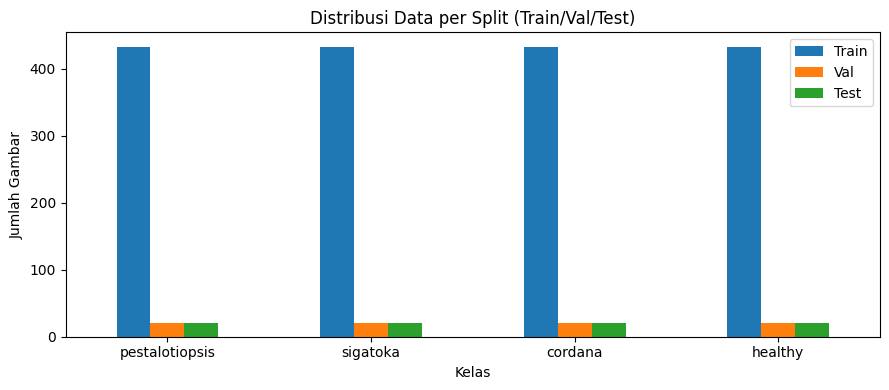

In [ ]:
ax = df_split_all.set_index("Kelas")[["Train","Val","Test"]].plot(kind="bar", figsize=(9,4))
ax.set_title("Distribusi Data per Split (Train/Val/Test)")
ax.set_ylabel("Jumlah Gambar")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
